# 勉強会 DNN & PyTorch

本文書は、深層ニューラルネットワーク（DNN: Deep Neural Network）および PyTorch に関する勉強会の補足資料その１である。

|Date      |Version|Author |Comments|
|----------|-------|-------|--------|
|2021-07-15|1.0    |李 度勳|初版作成|
|2021-07-29|2.0    |三浦克介|線形分離不可能なデータに変更|

## 概要

以下の様な、線形分離**不可能**な学習データが与えられたとき、未知のデータ $(x,y)$ を Group 0 または Group 1 に分類するニューラルネットワークを考える。**一層**のネットワーク（単純パーセプトロン）での分離を試みる。

##学習の流れ
######1．学習データを準備&加工する
######2．順方向の学習関数を設定する
######3．学習の為のパラメータを設定
######4．学習
######5．学習結果を確認する


DNN構成に必要なモデュールを入れる

In [25]:
import torch 
import matplotlib.pyplot as plt
import random

##1．学習データを準備&加工する

In [26]:
N_DATA = 200

# データを自動生成する場合
# train_x =  []
# train_y =  []
# train_gr = []
# train_set = []

# for i in range(N_DATA):
#   x = random.uniform(0.0, 5.0)
#   y = random.uniform(0.0, 5.0)
#   train_x.append(x)
#   train_y.append(y)
#   train_gr.append(0 if y < 4 - (x-2.5)*(x-2.5) else 1)
#   train_set.append([train_x[i],train_y[i]])

# print("train_x = ", train_x)
# print("train_y = ", train_y)
# print("train_gr = ", train_gr)
# print("train_set = ", train_set)

# データを固定する場合
train_x =  [0.07254315182510573, 4.316973134450725, 2.9578877401806203, 2.22107105552476, 0.6320211617102972, 2.054904630192933, 2.563228485695138, 3.884744420124913, 4.07881595021661, 4.379495328049065, 1.884406510323009, 2.9055008384080527, 4.87461590715868, 4.11539114934788, 1.0610009227734158, 0.12228516130537936, 3.773841209925834, 1.977208390604281, 0.27501451639769303, 1.0583168814750659, 1.801209647842343, 1.9916352921602214, 0.42609556991897224, 1.8786307034880023, 4.050235394890934, 3.5161388806578304, 4.426935243717662, 0.2740665309551116, 0.3725342483619365, 0.05755049647072741, 3.5328126517556795, 1.4811413024375293, 4.555605597590943, 0.0076139878649839066, 0.40526956437547446, 0.11864865521534373, 3.4907270254078786, 4.565558719105269, 3.2065852251932507, 0.5912655833825653, 1.6324238702563976, 3.973544528082856, 4.811209294892291, 0.6913439764259571, 4.788554223992157, 4.056487011789315, 3.846907490805318, 2.7530894079665753, 2.874070683037573, 1.4620899093282609, 2.214923647378821, 4.173016408723374, 0.9969273186701733, 4.81706296419265, 4.344732142917197, 3.3419445126505627, 1.4593051045878713, 0.7091554486784124, 0.7003797159469849, 1.8181472980536335, 1.5725620170786292, 4.93690986308748, 0.28496956841947085, 2.991383773767339, 3.8513153611413764, 0.886466225375761, 2.3162753784461945, 3.978470284932521, 2.433971045056313, 2.0938213271302883, 3.7783482258059187, 4.89087160407827, 2.517729911335561, 0.34674760040097563, 2.496175107252867, 1.0951031113784349, 0.12668960300215582, 4.019849644495048, 0.9788395618526158, 0.7019525527468434, 0.9292104161016851, 4.13901075781263, 3.708135792661216, 2.523512542714589, 0.0976267203243858, 1.8532308482630822, 4.514674373576407, 1.1788732327556533, 2.8836895696012825, 3.0570737243515813, 2.1616283441308477, 0.572742913435258, 3.93387390874514, 4.906761403159005, 0.07859901849922801, 3.832955248815815, 3.7663371855685917, 1.9712724412408416, 4.606136592483986, 4.83007919339389, 1.4443612237491914, 3.2875062833727964, 2.195970195608866, 1.638699807253543, 2.7176163752645834, 4.715525357990781, 0.5377818557663094, 2.8017769574334643, 4.870076262427732, 1.03014306523503, 4.2845560759691885, 4.007191660010589, 2.881166799353519, 4.932036228926211, 4.385923154980057, 3.810510935462311, 3.5056121832536973, 3.1481527418623383, 1.0557846849932768, 4.860672929689828, 0.9033019954504612, 2.202883759272434, 3.4390520234719224, 1.5077544193071661, 2.1565292708453816, 3.40934554352605, 1.3205727039530184, 1.1230790436140892, 3.586516256376076, 1.1019034924910087, 4.018687686518344, 4.04831022557637, 2.156256616732794, 3.429370604178979, 1.7441490041425611, 4.451463687365641, 1.3863503862831101, 1.1341538057830935, 1.7512630248681043, 3.381338044289326, 4.810820074726064, 3.0322159056531897, 0.0919060845658215, 4.269070922188672, 4.415438519735081, 3.6869294401980692, 1.7018388061896155, 3.9464881920596646, 4.967928482615486, 0.9083568497074668, 1.4601014630810338, 0.4045427803891338, 1.9764833752732307, 0.26239962476970247, 1.2902157354537387, 0.5208243256886336, 4.181925390561258, 1.9980504842841889, 3.2013798743227335, 1.7808165392179354, 2.409531589369087, 4.760399389212903, 0.814876741667454, 0.22062568677790606, 1.8869872427683871, 2.6643704441533345, 1.7380471830560662, 4.313852802488028, 3.991570380754654, 3.1070167851395967, 0.0221245309970447, 0.5401941843802444, 2.051572513160819, 3.743744584588437, 0.0001839351160576319, 2.486832437513371, 4.171782835099079, 3.253014544458359, 1.1022178298881897, 3.9049159149500063, 4.174578743073144, 2.4493619408071146, 1.954905107136038, 3.44867283527313, 4.93597640833849, 2.296248689514686, 0.5434923953445009, 4.433255081433815, 4.980516887217956, 4.966678169836639, 2.4625979454593128, 0.6337176742566492, 1.0693394263069949, 1.0095997580945204, 4.401056960262388, 1.2077892137826614, 1.1385028783839717, 2.795115450698851, 4.231445337751712, 2.333150774461598]
train_y =  [3.395491027309858, 2.2062456404378006, 4.136982505705174, 1.7384666803748798, 4.352777300640454, 1.163211802968659, 2.4915294771349745, 4.557275563791094, 4.952317647617544, 3.3162449606876803, 4.695569586508509, 4.670576739926743, 1.9063489702305658, 4.431969184927572, 0.199793708247466, 0.6333931024866024, 2.9622635039589906, 2.0354434328532878, 3.2887923178769944, 2.4047036563780564, 4.860646853640165, 1.7812674266044282, 3.6164666597755706, 1.919631738762932, 1.047123748493151, 4.496573680237051, 2.896967325848248, 3.1533843877416086, 2.960925282135828, 4.218896952480031, 3.445691676042002, 0.6751650430177109, 0.4117669077568986, 4.1297740409833015, 2.3332365106558717, 4.409288048704454, 0.4999757384342346, 2.58119554912843, 1.7198503630802549, 4.421816087625677, 1.4968406327494344, 4.7785673217251325, 2.7278869491571287, 4.596202794252379, 0.8072384322492376, 3.5092963851567847, 4.550655415816922, 1.9811462363410164, 4.94001069389322, 4.466214881656815, 4.484136765117912, 1.9871524685596254, 0.6920052515130365, 1.6717278849511548, 4.1995371848066, 2.25554095758228, 4.098747547485001, 0.6567106013617652, 0.34332352407552225, 1.857129128667574, 2.9386183389393947, 0.1799024000684979, 0.34655753039933346, 4.788984476420261, 1.3388080804244962, 0.9980462504771653, 3.105160782011493, 0.9412645190049546, 4.36191683112458, 4.070590709364096, 2.84782372474718, 1.2652624690772951, 0.7310418229690019, 4.0704561140633775, 0.6848784275875991, 2.5931278935788162, 2.6977184921999515, 4.463032497931029, 0.09778804493271898, 4.300454806569142, 4.108417434550938, 2.8058200982143875, 4.662301041023338, 1.9097083401815413, 0.3724366293703618, 4.144964854828264, 2.209612874113889, 0.28117622185789837, 0.9358318661661597, 3.5684903693826264, 3.9488301031122264, 0.7688314254136436, 0.1636245704854694, 2.7228544997204462, 2.948228533202684, 0.8728164164029656, 4.475820735443442, 3.2789428469570927, 0.34094644792601325, 1.400099623175457, 4.1417631981189444, 0.6253055979654443, 1.1188302321351058, 2.700719853929492, 0.3318387774894782, 2.8479284784604686, 4.326819893819922, 4.6091626923456195, 1.1373107832743246, 3.7498378025241785, 1.2172829806799617, 1.9834437358947332, 4.143467741382019, 0.2661018195418513, 0.9076597869910791, 4.770404110092537, 0.25483516757257907, 0.601062040033784, 2.609946317033832, 1.5139894328856707, 1.8290345397242347, 0.7927351805397476, 4.076232256593189, 3.574413033650372, 1.5752031254902454, 3.5140317496646736, 2.4259368097072582, 1.2972076520981952, 2.413058064041909, 2.9856039434868276, 1.6093614907810543, 4.8515510559540065, 2.954353366810714, 4.809178734313425, 4.84991502952056, 0.9601303489107621, 3.030047030879721, 2.5141868149861066, 4.761929889910311, 2.3455848673283946, 3.554179453913537, 0.743524295020726, 3.651185144633551, 3.214816213546329, 2.6085693196601474, 4.816851451500558, 2.817179499285607, 0.16576813398205048, 3.806873317682418, 2.5668213922246785, 1.631519648693014, 0.07511457141819944, 3.960231038695463, 2.653914773877765, 1.508727829826093, 1.6392515585191303, 0.35491249945976633, 3.4744861264645923, 4.0145577590826615, 0.44189279142839266, 0.20477587507349515, 2.0974421923237236, 4.335542005989667, 2.2729510271408166, 3.917615707551458, 1.3521913957462113, 4.84823098708943, 0.04700142624550707, 2.060092327546841, 3.556550530842168, 0.3576231116762124, 2.6044015402876903, 4.785252582553456, 1.5943299759710543, 2.8903469217835633, 2.6407063647417104, 2.5112033788532946, 4.5877483557153225, 2.088560716600613, 0.8444705561245364, 0.6324309708004222, 4.544636077944821, 1.8797457191694504, 0.03455408765076773, 1.0092400502238115, 2.16356010352631, 2.3634751108783463, 0.37826252394887905, 4.142183610663733, 0.14236915801948635, 2.3578050923287757, 1.6399874032793842, 2.505614880148594, 0.509983916882833, 1.718766163944851, 1.2772246107431733, 1.8642721956561918, 0.15084216881480927, 3.3309929278811716, 1.0455934777962206]
train_gr =  [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]
train_set =  [[0.07254315182510573, 3.395491027309858], [4.316973134450725, 2.2062456404378006], [2.9578877401806203, 4.136982505705174], [2.22107105552476, 1.7384666803748798], [0.6320211617102972, 4.352777300640454], [2.054904630192933, 1.163211802968659], [2.563228485695138, 2.4915294771349745], [3.884744420124913, 4.557275563791094], [4.07881595021661, 4.952317647617544], [4.379495328049065, 3.3162449606876803], [1.884406510323009, 4.695569586508509], [2.9055008384080527, 4.670576739926743], [4.87461590715868, 1.9063489702305658], [4.11539114934788, 4.431969184927572], [1.0610009227734158, 0.199793708247466], [0.12228516130537936, 0.6333931024866024], [3.773841209925834, 2.9622635039589906], [1.977208390604281, 2.0354434328532878], [0.27501451639769303, 3.2887923178769944], [1.0583168814750659, 2.4047036563780564], [1.801209647842343, 4.860646853640165], [1.9916352921602214, 1.7812674266044282], [0.42609556991897224, 3.6164666597755706], [1.8786307034880023, 1.919631738762932], [4.050235394890934, 1.047123748493151], [3.5161388806578304, 4.496573680237051], [4.426935243717662, 2.896967325848248], [0.2740665309551116, 3.1533843877416086], [0.3725342483619365, 2.960925282135828], [0.05755049647072741, 4.218896952480031], [3.5328126517556795, 3.445691676042002], [1.4811413024375293, 0.6751650430177109], [4.555605597590943, 0.4117669077568986], [0.0076139878649839066, 4.1297740409833015], [0.40526956437547446, 2.3332365106558717], [0.11864865521534373, 4.409288048704454], [3.4907270254078786, 0.4999757384342346], [4.565558719105269, 2.58119554912843], [3.2065852251932507, 1.7198503630802549], [0.5912655833825653, 4.421816087625677], [1.6324238702563976, 1.4968406327494344], [3.973544528082856, 4.7785673217251325], [4.811209294892291, 2.7278869491571287], [0.6913439764259571, 4.596202794252379], [4.788554223992157, 0.8072384322492376], [4.056487011789315, 3.5092963851567847], [3.846907490805318, 4.550655415816922], [2.7530894079665753, 1.9811462363410164], [2.874070683037573, 4.94001069389322], [1.4620899093282609, 4.466214881656815], [2.214923647378821, 4.484136765117912], [4.173016408723374, 1.9871524685596254], [0.9969273186701733, 0.6920052515130365], [4.81706296419265, 1.6717278849511548], [4.344732142917197, 4.1995371848066], [3.3419445126505627, 2.25554095758228], [1.4593051045878713, 4.098747547485001], [0.7091554486784124, 0.6567106013617652], [0.7003797159469849, 0.34332352407552225], [1.8181472980536335, 1.857129128667574], [1.5725620170786292, 2.9386183389393947], [4.93690986308748, 0.1799024000684979], [0.28496956841947085, 0.34655753039933346], [2.991383773767339, 4.788984476420261], [3.8513153611413764, 1.3388080804244962], [0.886466225375761, 0.9980462504771653], [2.3162753784461945, 3.105160782011493], [3.978470284932521, 0.9412645190049546], [2.433971045056313, 4.36191683112458], [2.0938213271302883, 4.070590709364096], [3.7783482258059187, 2.84782372474718], [4.89087160407827, 1.2652624690772951], [2.517729911335561, 0.7310418229690019], [0.34674760040097563, 4.0704561140633775], [2.496175107252867, 0.6848784275875991], [1.0951031113784349, 2.5931278935788162], [0.12668960300215582, 2.6977184921999515], [4.019849644495048, 4.463032497931029], [0.9788395618526158, 0.09778804493271898], [0.7019525527468434, 4.300454806569142], [0.9292104161016851, 4.108417434550938], [4.13901075781263, 2.8058200982143875], [3.708135792661216, 4.662301041023338], [2.523512542714589, 1.9097083401815413], [0.0976267203243858, 0.3724366293703618], [1.8532308482630822, 4.144964854828264], [4.514674373576407, 2.209612874113889], [1.1788732327556533, 0.28117622185789837], [2.8836895696012825, 0.9358318661661597], [3.0570737243515813, 3.5684903693826264], [2.1616283441308477, 3.9488301031122264], [0.572742913435258, 0.7688314254136436], [3.93387390874514, 0.1636245704854694], [4.906761403159005, 2.7228544997204462], [0.07859901849922801, 2.948228533202684], [3.832955248815815, 0.8728164164029656], [3.7663371855685917, 4.475820735443442], [1.9712724412408416, 3.2789428469570927], [4.606136592483986, 0.34094644792601325], [4.83007919339389, 1.400099623175457], [1.4443612237491914, 4.1417631981189444], [3.2875062833727964, 0.6253055979654443], [2.195970195608866, 1.1188302321351058], [1.638699807253543, 2.700719853929492], [2.7176163752645834, 0.3318387774894782], [4.715525357990781, 2.8479284784604686], [0.5377818557663094, 4.326819893819922], [2.8017769574334643, 4.6091626923456195], [4.870076262427732, 1.1373107832743246], [1.03014306523503, 3.7498378025241785], [4.2845560759691885, 1.2172829806799617], [4.007191660010589, 1.9834437358947332], [2.881166799353519, 4.143467741382019], [4.932036228926211, 0.2661018195418513], [4.385923154980057, 0.9076597869910791], [3.810510935462311, 4.770404110092537], [3.5056121832536973, 0.25483516757257907], [3.1481527418623383, 0.601062040033784], [1.0557846849932768, 2.609946317033832], [4.860672929689828, 1.5139894328856707], [0.9033019954504612, 1.8290345397242347], [2.202883759272434, 0.7927351805397476], [3.4390520234719224, 4.076232256593189], [1.5077544193071661, 3.574413033650372], [2.1565292708453816, 1.5752031254902454], [3.40934554352605, 3.5140317496646736], [1.3205727039530184, 2.4259368097072582], [1.1230790436140892, 1.2972076520981952], [3.586516256376076, 2.413058064041909], [1.1019034924910087, 2.9856039434868276], [4.018687686518344, 1.6093614907810543], [4.04831022557637, 4.8515510559540065], [2.156256616732794, 2.954353366810714], [3.429370604178979, 4.809178734313425], [1.7441490041425611, 4.84991502952056], [4.451463687365641, 0.9601303489107621], [1.3863503862831101, 3.030047030879721], [1.1341538057830935, 2.5141868149861066], [1.7512630248681043, 4.761929889910311], [3.381338044289326, 2.3455848673283946], [4.810820074726064, 3.554179453913537], [3.0322159056531897, 0.743524295020726], [0.0919060845658215, 3.651185144633551], [4.269070922188672, 3.214816213546329], [4.415438519735081, 2.6085693196601474], [3.6869294401980692, 4.816851451500558], [1.7018388061896155, 2.817179499285607], [3.9464881920596646, 0.16576813398205048], [4.967928482615486, 3.806873317682418], [0.9083568497074668, 2.5668213922246785], [1.4601014630810338, 1.631519648693014], [0.4045427803891338, 0.07511457141819944], [1.9764833752732307, 3.960231038695463], [0.26239962476970247, 2.653914773877765], [1.2902157354537387, 1.508727829826093], [0.5208243256886336, 1.6392515585191303], [4.181925390561258, 0.35491249945976633], [1.9980504842841889, 3.4744861264645923], [3.2013798743227335, 4.0145577590826615], [1.7808165392179354, 0.44189279142839266], [2.409531589369087, 0.20477587507349515], [4.760399389212903, 2.0974421923237236], [0.814876741667454, 4.335542005989667], [0.22062568677790606, 2.2729510271408166], [1.8869872427683871, 3.917615707551458], [2.6643704441533345, 1.3521913957462113], [1.7380471830560662, 4.84823098708943], [4.313852802488028, 0.04700142624550707], [3.991570380754654, 2.060092327546841], [3.1070167851395967, 3.556550530842168], [0.0221245309970447, 0.3576231116762124], [0.5401941843802444, 2.6044015402876903], [2.051572513160819, 4.785252582553456], [3.743744584588437, 1.5943299759710543], [0.0001839351160576319, 2.8903469217835633], [2.486832437513371, 2.6407063647417104], [4.171782835099079, 2.5112033788532946], [3.253014544458359, 4.5877483557153225], [1.1022178298881897, 2.088560716600613], [3.9049159149500063, 0.8444705561245364], [4.174578743073144, 0.6324309708004222], [2.4493619408071146, 4.544636077944821], [1.954905107136038, 1.8797457191694504], [3.44867283527313, 0.03455408765076773], [4.93597640833849, 1.0092400502238115], [2.296248689514686, 2.16356010352631], [0.5434923953445009, 2.3634751108783463], [4.433255081433815, 0.37826252394887905], [4.980516887217956, 4.142183610663733], [4.966678169836639, 0.14236915801948635], [2.4625979454593128, 2.3578050923287757], [0.6337176742566492, 1.6399874032793842], [1.0693394263069949, 2.505614880148594], [1.0095997580945204, 0.509983916882833], [4.401056960262388, 1.718766163944851], [1.2077892137826614, 1.2772246107431733], [1.1385028783839717, 1.8642721956561918], [2.795115450698851, 0.15084216881480927], [4.231445337751712, 3.3309929278811716], [2.333150774461598, 1.0455934777962206]]


グループ0と1を区別しやすく、x,yの座標系に色で表現をする
* グループ0は赤
* グループ1は青 

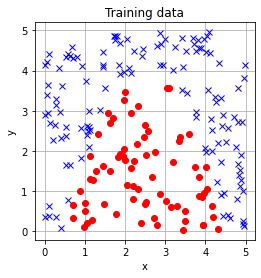

In [27]:
ax=plt.figure().add_subplot(111)
ax.set_aspect('equal')

for dot,gr in zip(train_set,train_gr):
    if gr == 0:
        plt.plot(dot[0],dot[1], 'r'+'o')
    elif gr == 1:
        plt.plot(dot[0],dot[1], 'b'+'x')

plt.title('Training data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.savefig('linear_nonseparable_training_data.png')

学習をさせる為、データを　「Tensor」　の形式に変換する

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_set_tensor = torch.FloatTensor(train_set).to(device)
train_gr_tensor = torch.FloatTensor(train_gr).to(device)
print(train_set_tensor)
print(train_gr_tensor)

tensor([[7.2543e-02, 3.3955e+00],
        [4.3170e+00, 2.2062e+00],
        [2.9579e+00, 4.1370e+00],
        [2.2211e+00, 1.7385e+00],
        [6.3202e-01, 4.3528e+00],
        [2.0549e+00, 1.1632e+00],
        [2.5632e+00, 2.4915e+00],
        [3.8847e+00, 4.5573e+00],
        [4.0788e+00, 4.9523e+00],
        [4.3795e+00, 3.3162e+00],
        [1.8844e+00, 4.6956e+00],
        [2.9055e+00, 4.6706e+00],
        [4.8746e+00, 1.9063e+00],
        [4.1154e+00, 4.4320e+00],
        [1.0610e+00, 1.9979e-01],
        [1.2229e-01, 6.3339e-01],
        [3.7738e+00, 2.9623e+00],
        [1.9772e+00, 2.0354e+00],
        [2.7501e-01, 3.2888e+00],
        [1.0583e+00, 2.4047e+00],
        [1.8012e+00, 4.8606e+00],
        [1.9916e+00, 1.7813e+00],
        [4.2610e-01, 3.6165e+00],
        [1.8786e+00, 1.9196e+00],
        [4.0502e+00, 1.0471e+00],
        [3.5161e+00, 4.4966e+00],
        [4.4269e+00, 2.8970e+00],
        [2.7407e-01, 3.1534e+00],
        [3.7253e-01, 2.9609e+00],
        [5.755

##2．ネットワーク構造の定義
* 使用する関数
* 層数
* 各層のニューロン数
などを定義する。

In [29]:
class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.layers.append(torch.nn.Linear(2, 1))
        self.layers.append(torch.nn.Sigmoid())

    def forward(self, x):
        for layer in self.layers:
          x = layer(x)
        return x

model = NeuralNet().to(device)

##3．学習の為のパラメータを設定
* 損失関数 : 平均自乗誤差 (Mean Square Error)
* 最適化手法：Adam
* 学習回数 : 50000
* 学習率 : 0.01

In [30]:
learning_rate = 0.01
Loss_criterion = torch.nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
n_epoch = 50000

##4．学習

train loss at 0 is 0.21380190551280975
train loss at 5000 is 0.16052715480327606
train loss at 10000 is 0.16052715480327606
train loss at 15000 is 0.16052716970443726
train loss at 20000 is 0.16052716970443726
train loss at 25000 is 0.16052716970443726
train loss at 30000 is 0.16052716970443726
train loss at 35000 is 0.16052715480327606
train loss at 40000 is 0.16052715480327606
train loss at 45000 is 0.16052715480327606


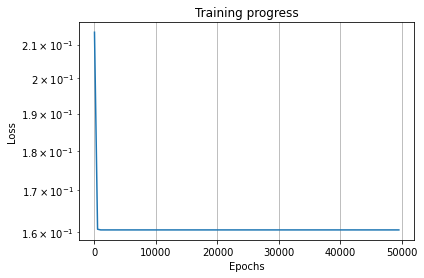

In [31]:
model.train()

graph_x = []
graph_y = []
for epoch in range(n_epoch):
    
    optimizer.zero_grad()
    train_output = model(train_set_tensor)
    
    train_loss = Loss_criterion(train_output.squeeze() , train_gr_tensor)
    if epoch%(n_epoch/10) == 0:
      print('train loss at {} is {}'.format(epoch, train_loss.item()))
    if epoch%(n_epoch/100) == 0:
      graph_x.append(epoch)
      graph_y.append(train_loss.item())

    # train_loss.backward()
    train_loss.backward(retain_graph=True)
    optimizer.step()

ax=plt.figure().add_subplot(111)
ax.set_yscale('log')
plt.title('Training progress')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.plot(graph_x, graph_y)
plt.savefig('loss_function2.png')

##5．学習結果を確認する

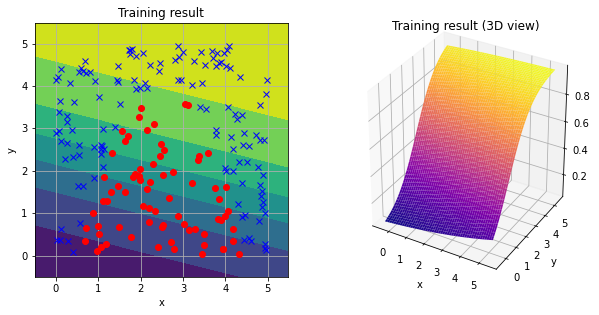

In [32]:
import numpy as np

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_aspect('equal')
plt.title('Training result')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

x = np.arange(-0.5, 5.5, 0.02)
y = np.arange(-0.5, 5.5, 0.02)
z = np.empty((y.size, x.size))

model.eval()
for j in range(y.size):
  yy = y[j]
  for i in range(x.size):
    xx = x[i]
    z[j][i] = model(torch.FloatTensor([xx,yy]))
ax1.contourf(x, y, z)
for dot,gr in zip(train_set,train_gr):
    if gr == 0:
        ax1.plot(dot[0],dot[1], 'r'+'o')
    elif gr == 1:
        ax1.plot(dot[0],dot[1], 'b'+'x')

x,y = np.meshgrid(x, y)
ax2 = fig.add_subplot(1,2,2,projection='3d')
plt.title('Training result (3D view)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
ax2.plot_surface(x, y, z, cmap='plasma')
plt.savefig('result_of_training2.png')